In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.special import ellipk
from math import sinh, sqrt, pi

# Define the elliptic integral K(k)
def K(k):
    integrand = lambda theta: 1 / np.sqrt(1 - k**2 * np.sin(theta)**2)
    return quad(integrand, 0, pi/2)[0]

# Given values (example values, replace with actual values)
w = 0.00045  # width
s = 0.00045  # spacing
h1 = 1e-4
e_r1 = 9.4
c = 3e8  # speed of light in vacuum (m/s)
l = 0.001

# Calculate k_1, k'_1, k_0, k'_0
k_1 = np.sinh(pi * w / (4 * h1)) / np.sinh(pi * (w + 2 * s) / (4 * h1))
k_0 = w / (w + 2 * s)
k_p1 = sqrt(1 - k_1**2)
k_p0 = sqrt(1 - k_0**2)

# Calculate K values
K_k1 = K(k_1)
K_kp1 = K(k_p1)
K_k0 = K(k_0)
K_kp0 = K(k_p0)

# Calculate e_eff
e_eff = 1 + ((e_r1 - 1) / 2) * (K_k1 / K_kp1) * (K_kp0 / K_k0)

# Calculate frequency
freq = c / (2 * l * sqrt(e_eff))

freq = freq / 1e9
print(f"Frequency: {freq} GHz")


Frequency: 100.67793697712342 GHz


<ipython-input-81-56c1216cde58>:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(integrand, 0, pi/2)[0]
<ipython-input-81-56c1216cde58>:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, pi/2)[0]


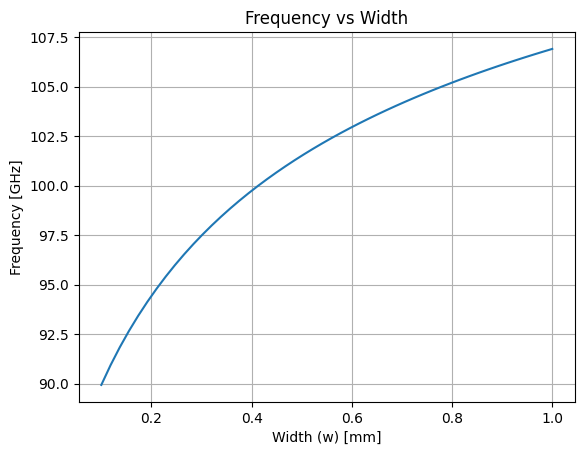

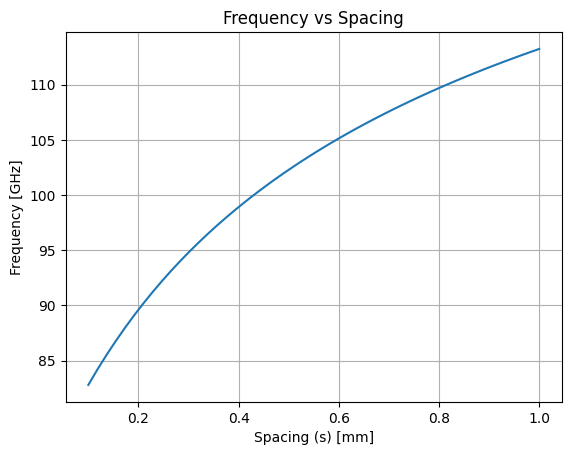

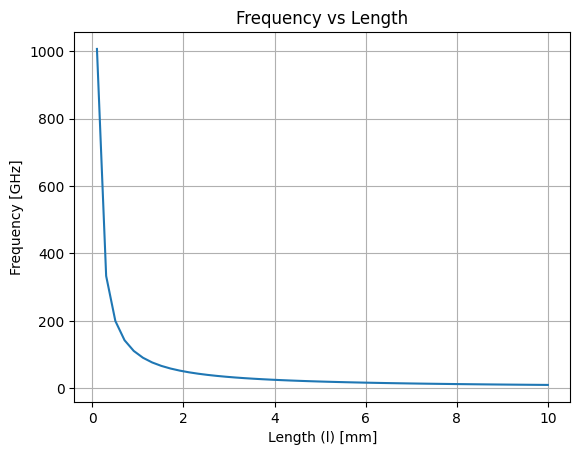

In [ ]:
import numpy as np
from scipy.integrate import quad
from math import sinh, sqrt, pi
import matplotlib.pyplot as plt

# Define the elliptic integral K(k)
def K(k):
    integrand = lambda theta: 1 / np.sqrt(1 - k**2 * np.sin(theta)**2)
    return quad(integrand, 0, pi/2)[0]

# Given constants
e_r1 = 9.4
c = 3e8  # speed of light in vacuum (m/s)
h1 = 1e-4

def calculate_frequency(w, s, l):
    # Calculate k_1, k'_1, k_0, k'_0
    k_1 = np.sinh(pi * w / (4 * h1)) / np.sinh(pi * (w + 2 * s) / (4 * h1))
    k_0 = w / (w + 2 * s)
    k_p1 = sqrt(1 - k_1**2)
    k_p0 = sqrt(1 - k_0**2)

    # Calculate K values
    K_k1 = K(k_1)
    K_kp1 = K(k_p1)
    K_k0 = K(k_0)
    K_kp0 = K(k_p0)

    # Calculate e_eff
    e_eff = 1 + ((e_r1 - 1) / 2) * (K_k1 / K_kp1) * (K_kp0 / K_k0)

    # Calculate frequency
    freq = c / (2 * l * sqrt(e_eff))
    freq = freq / 1e9  # Convert to GHz
    return freq

# Define ranges for w, s, and l
w_values = np.linspace(0.0001, 0.001, 50)  # Widths from 0.1mm to 1mm
s_values = np.linspace(0.0001, 0.001, 50)  # Spacings from 0.1mm to 1mm
l_values = np.linspace(0.0001, 0.01, 50)   # Lengths from 0.1mm to 10mm

# Plot frequency as a function of w, s, and l

# Plot for varying w with fixed s and l
s_fixed = 0.00045
l_fixed = 0.001
freq_w = [calculate_frequency(w, s_fixed, l_fixed) for w in w_values]

plt.figure()
plt.plot(w_values * 1e3, freq_w)  # Convert w to mm for plotting
plt.xlabel('Width (w) [mm]')
plt.ylabel('Frequency [GHz]')
plt.title('Frequency vs Width')
plt.grid(True)

# Plot for varying s with fixed w and l
w_fixed = 0.00045
freq_s = [calculate_frequency(w_fixed, s, l_fixed) for s in s_values]

plt.figure()
plt.plot(s_values * 1e3, freq_s)  # Convert s to mm for plotting
plt.xlabel('Spacing (s) [mm]')
plt.ylabel('Frequency [GHz]')
plt.title('Frequency vs Spacing')
plt.grid(True)

# Plot for varying l with fixed w and s
freq_l = [calculate_frequency(w_fixed, s_fixed, l) for l in l_values]

plt.figure()
plt.plot(l_values * 1e3, freq_l)  # Convert l to mm for plotting
plt.xlabel('Length (l) [mm]')
plt.ylabel('Frequency [GHz]')
plt.title('Frequency vs Length')
plt.grid(True)

plt.show()


<ipython-input-88-e6c492a06ec7>:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(integrand, 0, pi/2)[0]
<ipython-input-88-e6c492a06ec7>:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, pi/2)[0]


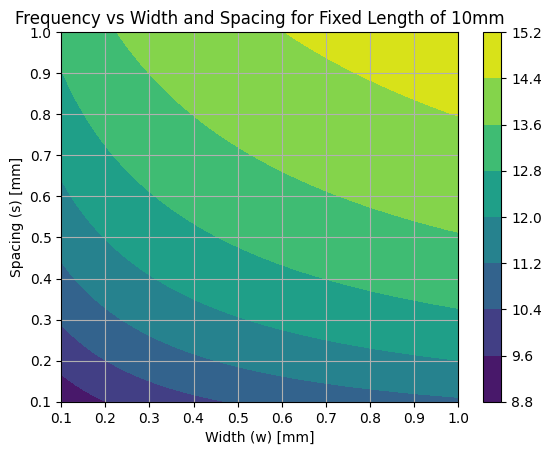

In [ ]:
import numpy as np
from scipy.integrate import quad
from math import sinh, sqrt, pi
import matplotlib.pyplot as plt

# Define the elliptic integral K(k)
def K(k):
    integrand = lambda theta: 1 / np.sqrt(1 - k**2 * np.sin(theta)**2)
    return quad(integrand, 0, pi/2)[0]

# Given constants
e_r1 = 9.4
c = 3e8  # speed of light in vacuum (m/s)
h1 = 1e-4
l_fixed = 0.008  # Fixed length of 10mm

def calculate_frequency(w, s, l):
    # Calculate k_1, k'_1, k_0, k'_0
    k_1 = np.sinh(pi * w / (4 * h1)) / np.sinh(pi * (w + 2 * s) / (4 * h1))
    k_0 = w / (w + 2 * s)
    k_p1 = sqrt(1 - k_1**2)
    k_p0 = sqrt(1 - k_0**2)

    # Calculate K values
    K_k1 = K(k_1)
    K_kp1 = K(k_p1)
    K_k0 = K(k_0)
    K_kp0 = K(k_p0)

    # Calculate e_eff
    e_eff = 1 + ((e_r1 - 1) / 2) * (K_k1 / K_kp1) * (K_kp0 / K_k0)

    # Calculate frequency
    freq = c / (2 * l * sqrt(e_eff))
    freq = freq / 1e9  # Convert to GHz
    return freq

# Define ranges for w and s
w_values = np.linspace(0.0001, 0.001, 50)  # Widths from 0.1mm to 1mm
s_values = np.linspace(0.0001, 0.001, 50)  # Spacings from 0.1mm to 1mm

# Create a meshgrid for w and s
W, S = np.meshgrid(w_values, s_values)

# Calculate the frequency for each pair of (w, s)
Frequencies = np.array([[calculate_frequency(w, s, l_fixed) for w in w_values] for s in s_values])

# Plot the results
plt.figure()
contour = plt.contourf(W * 1e3, S * 1e3, Frequencies, cmap='viridis')
plt.colorbar(contour)

plt.xlabel('Width (w) [mm]')
plt.ylabel('Spacing (s) [mm]')
plt.title('Frequency vs Width and Spacing for Fixed Length of 10mm')
plt.grid(True)
plt.show()


<ipython-input-89-dfc4018ea1b4>:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(integrand, 0, pi/2)[0]
<ipython-input-89-dfc4018ea1b4>:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, pi/2)[0]


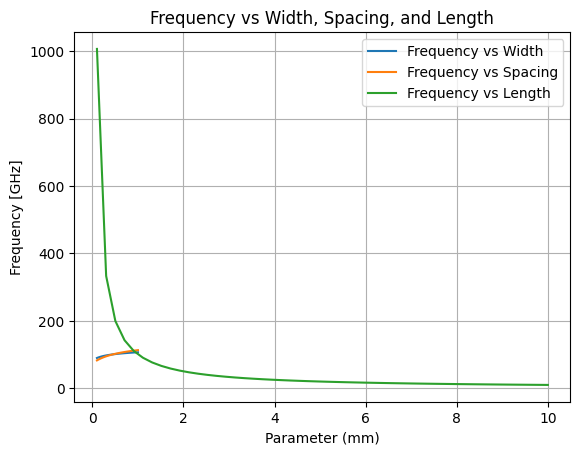

Point of intersection: w = 0.4500 mm, s = 0.4500 mm, l = 1.0000 mm


In [ ]:
import numpy as np
from scipy.integrate import quad
from math import sinh, sqrt, pi
import matplotlib.pyplot as plt

# Define the elliptic integral K(k)
def K(k):
    integrand = lambda theta: 1 / np.sqrt(1 - k**2 * np.sin(theta)**2)
    return quad(integrand, 0, pi/2)[0]

# Given constants
e_r1 = 9.4
c = 3e8  # speed of light in vacuum (m/s)
h1 = 1e-4

def calculate_frequency(w, s, l):
    # Calculate k_1, k'_1, k_0, k'_0
    k_1 = np.sinh(pi * w / (4 * h1)) / np.sinh(pi * (w + 2 * s) / (4 * h1))
    k_0 = w / (w + 2 * s)
    k_p1 = sqrt(1 - k_1**2)
    k_p0 = sqrt(1 - k_0**2)

    # Calculate K values
    K_k1 = K(k_1)
    K_kp1 = K(k_p1)
    K_k0 = K(k_0)
    K_kp0 = K(k_p0)

    # Calculate e_eff
    e_eff = 1 + ((e_r1 - 1) / 2) * (K_k1 / K_kp1) * (K_kp0 / K_k0)

    # Calculate frequency
    freq = c / (2 * l * sqrt(e_eff))
    freq = freq / 1e9  # Convert to GHz
    return freq

# Define ranges for w, s, and l
w_values = np.linspace(0.0001, 0.001, 50)  # Widths from 0.1mm to 1mm
s_values = np.linspace(0.0001, 0.001, 50)  # Spacings from 0.1mm to 1mm
l_values = np.linspace(0.0001, 0.01, 50)   # Lengths from 0.1mm to 10mm

# Calculate frequency as a function of w, s, and l

# Calculate for varying w with fixed s and l
s_fixed = 0.00045
l_fixed = 0.001
freq_w = [calculate_frequency(w, s_fixed, l_fixed) for w in w_values]

# Calculate for varying s with fixed w and l
w_fixed = 0.00045
freq_s = [calculate_frequency(w_fixed, s, l_fixed) for s in s_values]

# Calculate for varying l with fixed w and s
freq_l = [calculate_frequency(w_fixed, s_fixed, l) for l in l_values]

# Plot all three graphs in one plot
plt.figure()

plt.plot(w_values * 1e3, freq_w, label='Frequency vs Width')  # Convert w to mm for plotting
plt.plot(s_values * 1e3, freq_s, label='Frequency vs Spacing')  # Convert s to mm for plotting
plt.plot(l_values * 1e3, freq_l, label='Frequency vs Length')  # Convert l to mm for plotting

plt.xlabel('Parameter (mm)')
plt.ylabel('Frequency [GHz]')
plt.title('Frequency vs Width, Spacing, and Length')
plt.legend()
plt.grid(True)

plt.show()

# Find points of intersection
from scipy.optimize import fsolve

def equations(vars):
    w, s, l = vars
    eq1 = calculate_frequency(w, s_fixed, l_fixed) - calculate_frequency(w_fixed, s, l_fixed)
    eq2 = calculate_frequency(w_fixed, s, l_fixed) - calculate_frequency(w_fixed, s_fixed, l)
    eq3 = calculate_frequency(w, s_fixed, l_fixed) - calculate_frequency(w_fixed, s_fixed, l)
    return [eq1, eq2, eq3]

# Initial guess
initial_guess = [w_fixed, s_fixed, l_fixed]
w_intersect, s_intersect, l_intersect = fsolve(equations, initial_guess)

print(f'Point of intersection: w = {w_intersect * 1e3:.4f} mm, s = {s_intersect * 1e3:.4f} mm, l = {l_intersect * 1e3:.4f} mm')
